In [45]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [47]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Prepare Dataset

In [48]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']

df = df[base]

In [49]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## EDA

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

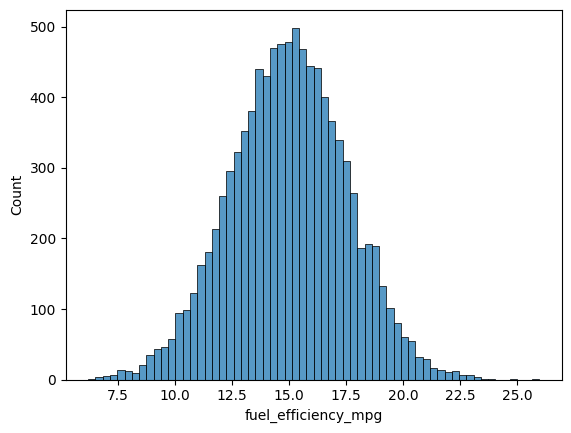

In [50]:
import seaborn as sns
sns.histplot(df.fuel_efficiency_mpg)

No Long tail


## Question 1
There's one column with missing values. What is it?

In [51]:
df.isnull().any()

engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
fuel_efficiency_mpg    False
dtype: bool

## Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [52]:
float(df.horsepower.median())

149.0

In [53]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [54]:
n,n_val,n_test,n_train

(9704, 1940, 1940, 5824)

In [55]:
df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[: n_train]
df_val = df_shuffled.iloc[n_train:n_train + n_val]
df_test = df_shuffled.iloc[n_train + n_val:]

In [56]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [57]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [58]:
df_test

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,140,148.0,2704.826005,2017,15.804354
1,210,136.0,3001.227490,2004,14.272374
2,210,152.0,3747.467392,2021,11.748441
3,190,128.0,2705.833636,2014,16.485991
4,230,156.0,2505.939657,2005,17.779704
...,...,...,...,...,...
1935,210,163.0,1972.029124,2011,19.961672
1936,160,126.0,3011.588014,2009,14.651056
1937,290,187.0,2440.508039,2019,18.404435
1938,260,129.0,1865.404480,2019,20.502460


In [59]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [60]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [61]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


In [62]:
df_train.isnull().any()

engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
dtype: bool

## Question 3

In [63]:
#filling with 0 and mean

def prepare_X_fill_0(df):
    df = df.fillna(0)
    X = df.values
    return X

def prepare_X_fill_mean(df):
    df_train_copy = df_train.copy()
    df = df.fillna(df_train_copy["horsepower"].mean())
    X = df.values
    return X


In [64]:
X_train_fill_0 = prepare_X_fill_0(df_train)

In [65]:
X_train_fill_0

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [66]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [67]:
w0, w = train_linear_regression(X_train_fill_0, y_train)

In [68]:
y_pred = w0 + X_train_fill_0.dot(w)

<Axes: ylabel='Count'>

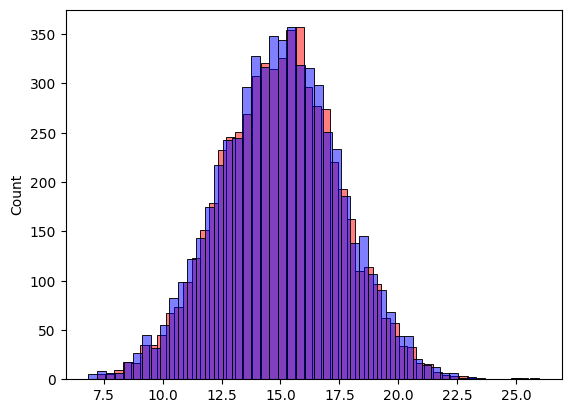

In [69]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [70]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

rmse(y_train, y_pred)

np.float64(0.5202614265099076)

In [71]:
X_train_fill_mean = prepare_X_fill_mean(df_train)

In [72]:
X_train_fill_mean

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [73]:
w0, w = train_linear_regression(X_train_fill_mean, y_train)

In [74]:
y_pred = w0 + X_train_fill_mean.dot(w)

<Axes: ylabel='Count'>

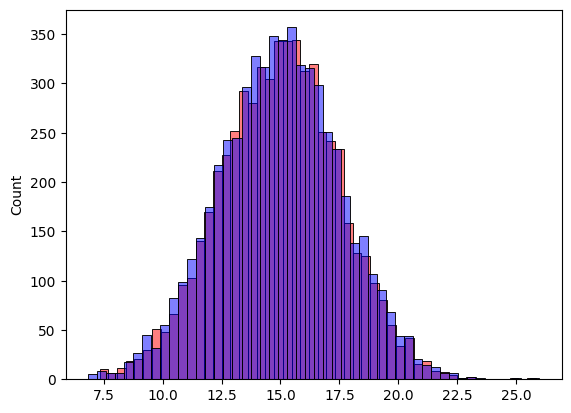

In [75]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [76]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

rmse(y_train, y_pred)

np.float64(0.4624412137959964)

## Validating the model

In [77]:
X_train_fill_0 = prepare_X_fill_0(df_train)
w0, w = train_linear_regression(X_train_fill_0, y_train)


X_val = prepare_X_fill_0(df_val)

y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5173782638844466)

In [78]:
X_train_fill_mean = prepare_X_fill_mean(df_train)
w0, w = train_linear_regression(X_train_fill_mean, y_train)

X_val = prepare_X_fill_mean(df_val)

y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4635965042334585)

## Regularization

In [79]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [80]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:

    X_train = prepare_X_fill_0(df_train)
    
    
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X_fill_0(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, score)

0 28.82736547365895 0.5173782638844466
0.01 24.92683841981215 0.5171115525769823
0.1 11.239661084581073 0.5187525130702517
1 1.7315979411219746 0.5222348802093141
5 0.3638075020482907 0.522891609282361
10 0.18306246621686947 0.5229812979636599
100 0.01841801730688404 0.5230636233819933


In [81]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


## Question 5

In [82]:
import numpy as np

score_array = []

def prepare_X_fill_0(df):
    df = df.fillna(0)
    return df.values

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    return np.sqrt(se.mean())

for seed in range(10):
    np.random.seed(seed)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[: n_train].reset_index(drop=True)
    df_val = df_shuffled.iloc[n_train:n_train + n_val].reset_index(drop=True)
    df_test = df_shuffled.iloc[n_train + n_val:].reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X_fill_0(df_train)
    X_val = prepare_X_fill_0(df_val)

    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    score_array.append(score)

    print(seed, score)

print("Standard deviation:", round(np.std(score_array), 3))


0 0.5206531296294218
1 0.521338891285577
2 0.5228069974803171
3 0.515951674119676
4 0.5109129460053851
5 0.52834064601107
6 0.5313910658146311
7 0.5090670387381733
8 0.5147399129511132
9 0.5131865908224594
Standard deviation: 0.007


In [83]:
np.std(score_array)

np.float64(0.006989446426433706)